# Load the dataset

In [1]:
import os
import urllib
import tarfile

In [2]:
DATASET_ROOT = '/home/l-ashwin/Datasets/'
DATASET_DIR  = 'housing'
DATASET_PATH = os.path.join(DATASET_ROOT, DATASET_DIR)

os.makedirs(os.path.join(DATASET_ROOT, DATASET_DIR), exist_ok=True)

In [3]:
dataset_url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"

In [4]:
def download_and_extract(dataset_url, DATASET_PATH):
    """
    get tgz from dataset_url, download and store at DATASET_PATH
    """
    
    # retrive and store tgz
    tgz_path = os.path.join(DATASET_PATH, 'housing.tgz')
    urllib.request.urlretrieve(url=dataset_url, filename=tgz_path)
    
    # extract
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path=DATASET_PATH)
    tgz_file.close()
    
download_and_extract(dataset_url, DATASET_PATH)

In [5]:
import pandas as pd

In [6]:
housing = pd.read_csv(os.path.join(DATASET_PATH, 'housing.csv'))
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


info
- total_bedrooms feature has missing values.  
- except for ocean_proximity all are numeric features

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


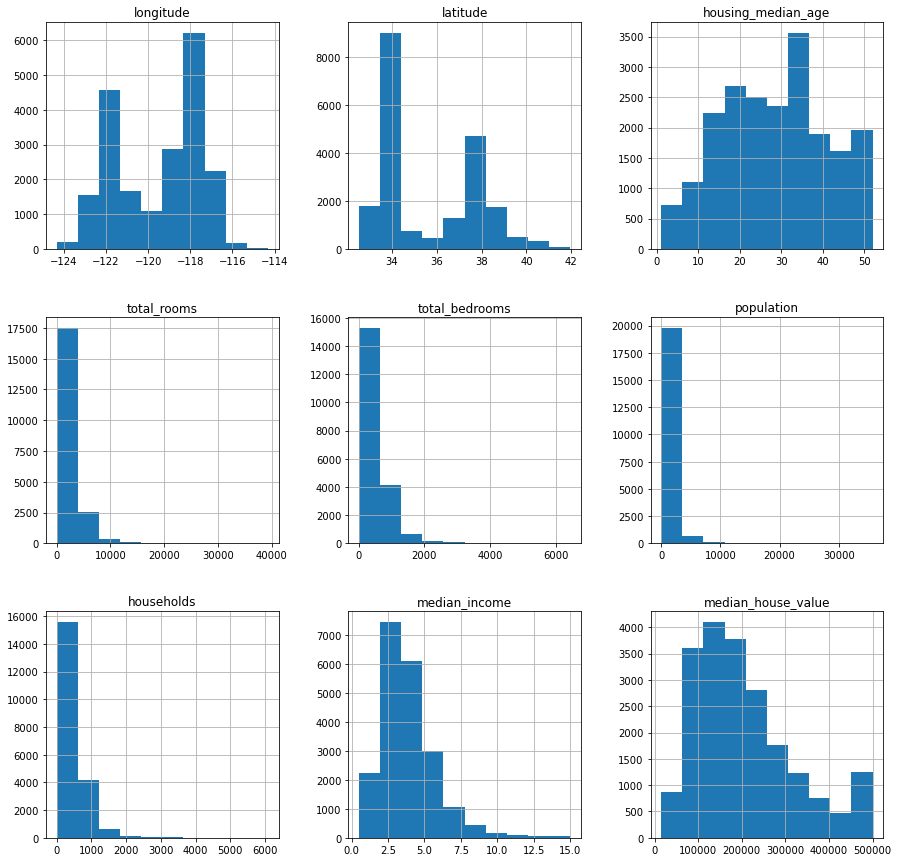

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(figsize=(15,15))
plt.show()

# Test Split

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [12]:
# split purely randomly
train_set, test_Set = train_test_split(housing, test_size=0.2, random_state=42)

If we are told that median_income is very important feature for predicting the house price and we want test set to br representative of various categories of income

In [13]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
                               labels = [1, 2, 3, 4, 5])

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
# stratified split over median income categories
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

In [16]:
# split purely randomly
rand_train_set, rand_test_Set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
stratified = strat_test_set.income_cat.value_counts()/len(strat_test_set)
random     = rand_test_Set.income_cat.value_counts()/len(rand_test_Set)
overall    = housing.income_cat.value_counts()/len(housing)

In [18]:
pd.DataFrame({
    'Overall'    : overall,
    'Stratified' : stratified,
    'Random'     : random,
    'Random % error' : (random-overall)/overall*100,
    'Stratified % error' : (stratified-overall)/overall*100
    
}).sort_index()

,Overall,Stratified,Random,Random % error,Stratified % error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# EDA

In [20]:
# hereonwards train data is all we can see
housing = strat_train_set.copy()

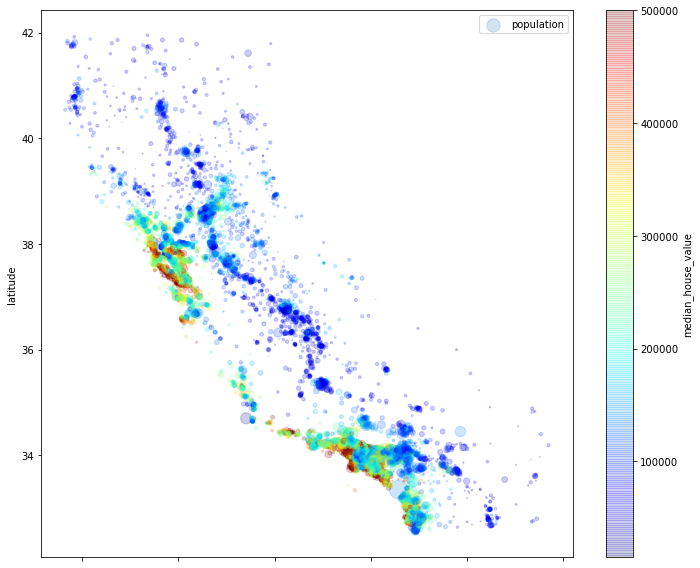

In [21]:
housing.plot(kind  = 'scatter', 
             x     = 'longitude', 
             y     = 'latitude',
             alpha = 0.2,
             s     = housing['population']/100,
             label = 'population',
             c     = 'median_house_value',
             cmap  = plt.get_cmap('jet'),
             colorbar = True,
             figsize  = (10,8))

plt.tight_layout()
plt.show()

In [22]:
# the corelation coefficient only measures the linear corelation
corr_matrix = housing.corr()

In [23]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

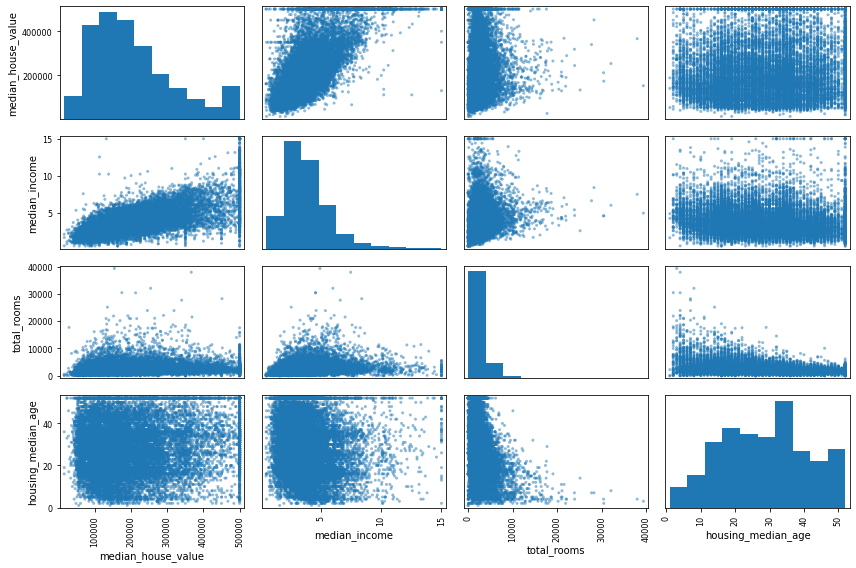

In [25]:
attibutes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attibutes], figsize=(12,8))
plt.tight_layout()
plt.show()

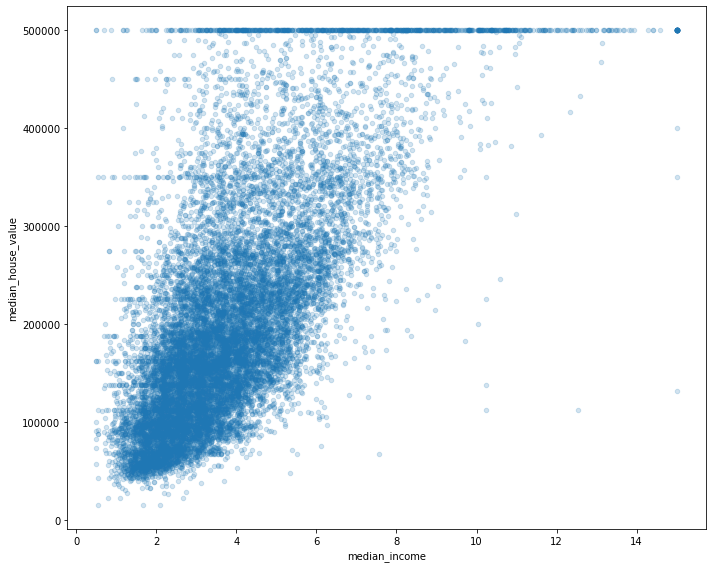

In [26]:
# median_income showed clear trend
housing.plot(kind  = 'scatter', 
             x     = 'median_income', 
             y     = 'median_house_value',
             alpha = 0.2,
             figsize  = (10,8))

plt.tight_layout()
plt.show()

# Attribute Combinations

Three of the attributes in the data 'total_rooms', 'total_bedrooms' and 'population' which are summation over entire district, but it makes sence to observe their normalised values.

In [27]:
housing['bedrooms_per_room']        = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing['rooms_per_household']      = housing['total_rooms']/housing['households']

In [28]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

info:  
- rooms_per_household has stronger corelation with median_house_value than total_rooms  
- bedrooms_per_room has stronger corelation with median_house_value than total_bedrooms

# Prepairing Data

In [29]:
# Let's split attributes and labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

In [30]:
# total beadrooms has missing values
housing.dropna(subset=['total_bedrooms'])        #option1 drop examples with missing values
housing.drop(labels=['total_bedrooms'], axis=1)  #option2 drop attribute
median_ser = housing['total_bedrooms'].median()  #option3 fill missing value with some statestic
housing['total_bedrooms'].fillna(value=median_ser, inplace=True)

In [31]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']]

## Numerical Features

In [32]:
# In our training set only one attribute has missing values but we can't be sure that will be the case during 
# test time, so let's make a solution to deal with missing values in all features

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
# result will be in numpy array
X = imputer.transform(housing_num)
housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Categorical Features

In [36]:
# dealing with categorical attributes
housing_cat.head(2)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN


In [37]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_enc = ordinal_encoder.fit_transform(housing_cat)

In [38]:
housing_cat_enc

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
# OrdinalEncoder representation imparts order in categories (nearby values are similar)
# if feature does not have order it can be encoded using one hot encoder to avoide this

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

In [41]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformer

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# to be able to transform featues using column numbers
rooms_col, bedrooms_col, population_col, households_col = 3, 4, 5, 6

In [44]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN


In [45]:
#BaseEstimator - provides get_params() and set_params
#TransformerMixin - provides fit_transform

class CombineAttributes(BaseEstimator, TransformerMixin):
    def __init__(self, add_bederooms_per_room=True):
        self.add_bederooms_per_room = add_bederooms_per_room
        self.new_attributes = None
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # as this transformation is dependant on column name either use column names from outside
        # or use column numbers either case it is not generalisable and needs attension
        X = pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns)
        rooms_per_household = X['total_rooms']/X['households']
        population_per_household = X['population']/X['households']
        
        if self.add_bederooms_per_room:
            bederooms_per_room  = X['total_bedrooms']/X['total_rooms']
            self.new_attributes = ['rooms_per_household', 'population_per_household', 'bederooms_per_room']
            return pd.concat([X, rooms_per_household, population_per_household, bederooms_per_room], axis=1).values
        else:
            self.new_attributes = ['rooms_per_household', 'population_per_household']
            return pd.concat([X, rooms_per_household, population_per_household], axis=1).values

In [46]:
# Feature Scaling options
# 1. Min Max Scaling / Normalization
# 2. Standardization - does not bound values in spesific range so not adversly affected by outliers

## Pipelines

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('add_featureas', CombineAttributes()),
    ('scaling', StandardScaler())
])

In [49]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [50]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)
cat_attributes = ['ocean_proximity']

In [51]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('add_featureas', CombineAttributes()),
    ('scaling', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', OneHotEncoder(), cat_attributes)
])

In [52]:
housing_prepared = full_pipeline.fit_transform(housing)

In [53]:
pd.DataFrame(housing_prepared).head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0


In [54]:
new_attributes = full_pipeline.named_transformers_['num']['add_featureas'].new_attributes
new_attributes

['rooms_per_household', 'population_per_household', 'bederooms_per_room']

In [55]:
cat_one_hot_attributes = list(full_pipeline.named_transformers_['cat'].categories_[0])
cat_one_hot_attributes

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [56]:
columns = num_attributes + new_attributes + cat_one_hot_attributes
columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'bederooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']